# Estresse concentrado em um buraco circular

Modelagem compucational do comportamento da tensão concentrada sobre um buraco circular.

### Importar pacotes

In [69]:
import numpy as np
import matplotlib.pyplot as plt

### Parâmetros

In [70]:
# Estresse aplicado em MPa
sigma = 100

# Raio do buraco em mm
radius = 20

# Posição X do buraco
hole_x = 0

### Gerar malha de grade

In [71]:
x = np.linspace(-200, 200, 800)
y = np.linspace(-50, 50, 400)
X, Y = np.meshgrid(x, y)

### Computa as distâncias radiais e ângulos para o buraco

In [72]:
r = np.sqrt((X - hole_x)**2 + Y**2)
theta = np.arctan2(Y, X - hole_x)

### Computa o campo de estresse ao redor do buraco

Calcula as componentes de tensões

In [73]:
T_radial = (sigma / 2) * (1 - radius**2 / r**2) + (sigma / 2) * (1 + 3 * radius**4 / radius**4 - 4 * radius**2 / radius**2) * np.cos(2 * theta)
T_shear = - (sigma / 2) * (1 - 3 * radius**4 / r**4 + 2 * radius**2 / r**2) * np.sin(2 * theta)
T_theta = (sigma / 2) * (1 + radius**2 / r**2) - (sigma / 2) * (1 + 3 * radius**4 / r**4) * np.cos(2 * theta)

Calcula a tensão total

In [74]:
T_hole = T_theta + T_shear + T_radial

Exclui as tensões dentro do buraco

In [75]:
T_hole[r < radius] = np.nan

### Gráfico de tensões totais

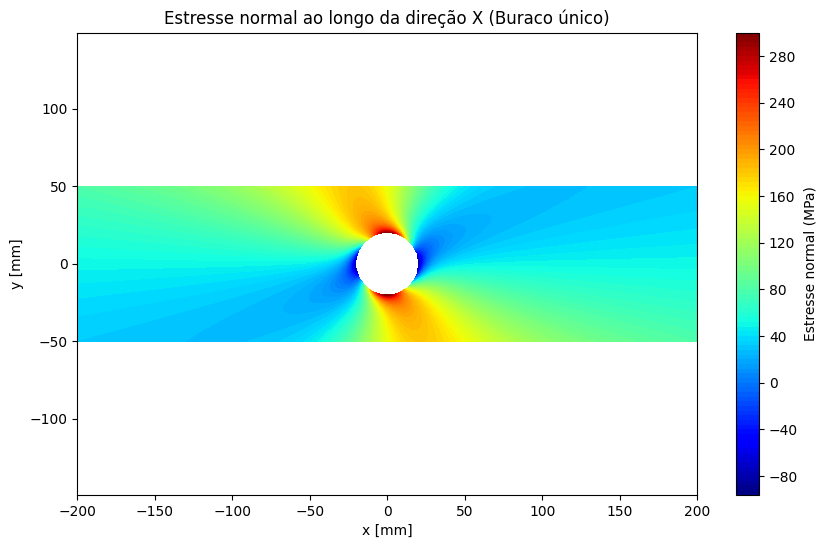

In [76]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_hole, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse normal ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)

### Gráfico de tensão radial

In [77]:
T_hole = T_radial
T_hole[r < radius] = np.nan

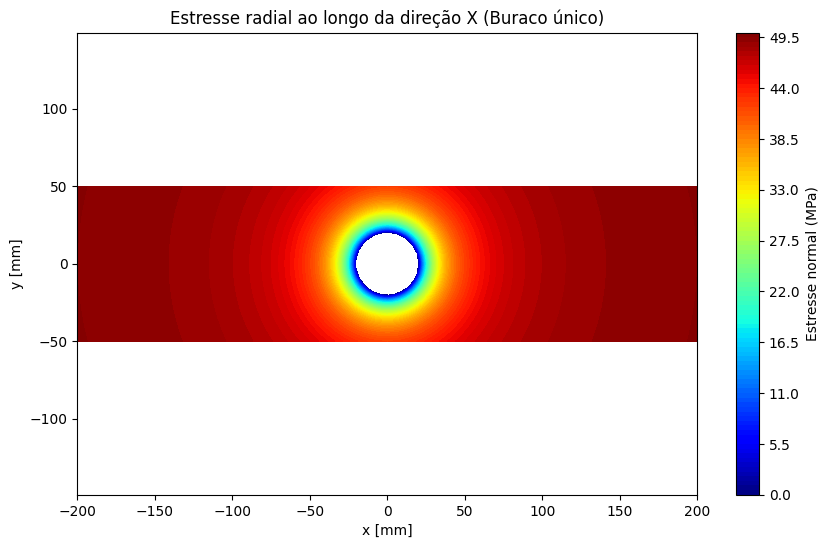

In [78]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_hole, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse radial ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)

### Gráfico da tensão cisalhante

In [79]:
T_hole = T_shear
T_hole[r < radius] = np.nan

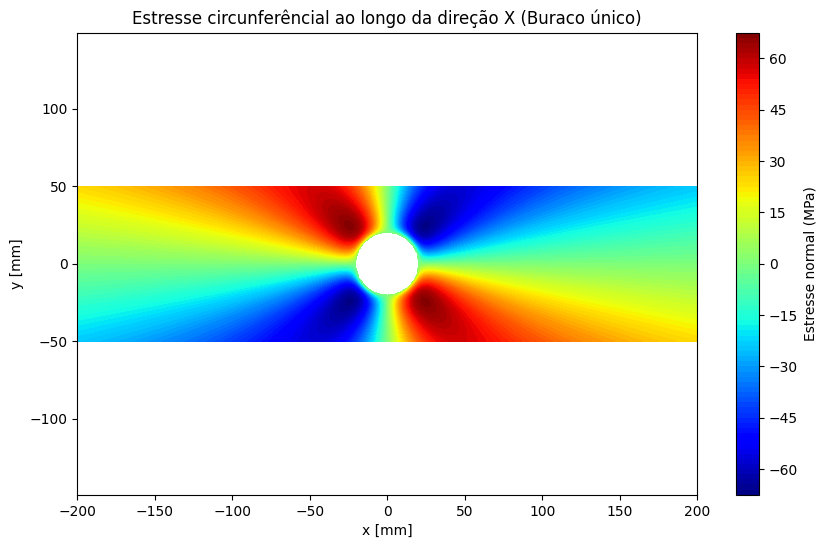

In [80]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_hole, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse circunferêncial ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)

### Gráfico de tensão circunferêncial

In [81]:
T_hole = T_theta
T_hole[r < radius] = np.nan

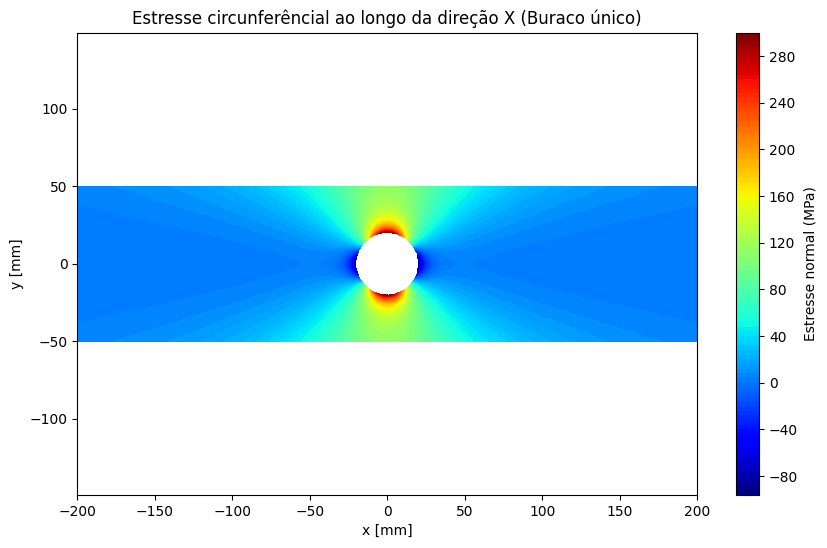

In [82]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_hole, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse circunferêncial ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)